<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=300, height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

<h2 style="text-align: center;"><b>Python. Matplotlib</b></h2>

<img align=left src="https://cdn.fedoramagazine.org/wp-content/uploads/2015/11/Python_logo.png" style="height:160px;" />

<img align=center src="https://d1.awsstatic.com/product-marketing/MXNet/matplotliblogo.da9fb710a95657990c795230d3207471ed3613e5.png" style="height:90px;" />

#### На основе http://www.inp.nsk.su/~grozin/python/ и http://www.playittodeath.ru/анализ-данных-при-помощи-python-графики-в-pandas/

---

## Библиотека Matplotlib

Есть несколько пакетов для построения графиков. Один из наиболее популярных - `matplotlib`. Если в `jupyter notebook` выполнить специальную `ipython` команду `%matplotlib inline`, то графики будут строиться в том же окне браузера (а не открываться в новом).  

Варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков - тогда их можно вертеть мышкой (в случае inline графиков это невозможно). Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`; конечно, растровые форматы годятся только для размещения графиков на web-страницах).  

`matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой (ввести `help(*имя функции*)`).

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
# обратите внимание на эту команду, 
# её стоит писать всегда в ячейке при импорте matplotlib
%matplotlib inline

# следующие три строчки вам не нужно знать
import scipy.stats as sps
import warnings
warnings.simplefilter('ignore')

---

Далее идут несколько интересных демонстрационных примеров. Пока что вам не нужно знать как они отрисовываются, к концу лекции всё станет ясно.

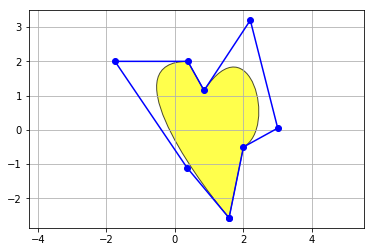

In [2]:
import matplotlib.path as mpath 
import matplotlib.patches as mpatches 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots() 

Path = mpath.Path 
path_data = [ 
(Path.MOVETO, (1.58, -2.57)), 
(Path.CURVE4, (0.35, -1.1)), 
(Path.CURVE4, (-1.75, 2.0)), 
(Path.CURVE4, (0.375, 2.0)), 
(Path.LINETO, (0.85, 1.15)), 
(Path.CURVE4, (2.2, 3.2)), 
(Path.CURVE4, (3, 0.05)), 
(Path.CURVE4, (2.0, -0.5)), 
(Path.CLOSEPOLY, (1.58, -2.57)), 
] 
codes, verts = zip(*path_data) 
path = mpath.Path(verts, codes) 
patch = mpatches.PathPatch(path, facecolor="yellow", alpha=0.7) 
ax.add_patch(patch) 

# plot control points and connecting lines 
x, y = zip(*path.vertices) 
line, = ax.plot(x, y, 'bo-') 

ax.grid() 
ax.axis('equal') 
plt.show()

Отрисовка точек:

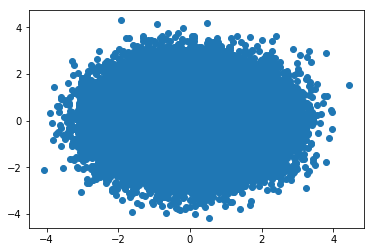

In [3]:
x = np.random.normal(size=100000)
y = np.random.normal(size=100000)
plt.plot(x, y, 'o');

Отрисовка тепловой карты (жёлтая область - высокая плостность точек, чёрная - нет точек):

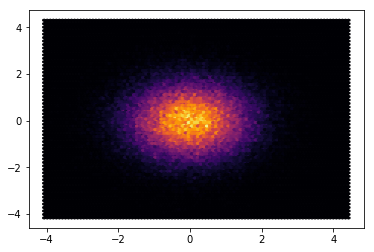

In [4]:
plt.hexbin(x, y, cmap='inferno');

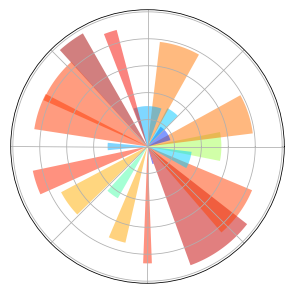

In [5]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

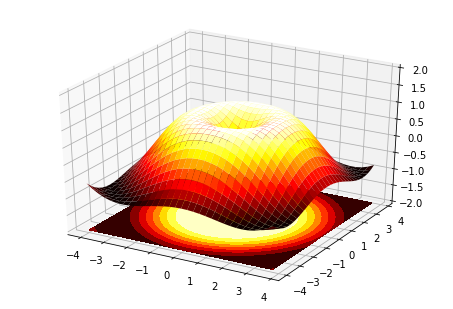

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()

Много других красивых и интересных графиков на matplotlib можно посмотреть здесь: http://matplotlib.org/gallery.html

---

## Основы matplotlib

Если вам нужно нарисовать какой-либо график, прежде всего нужно помнить про функцию `plt.plot()`:  

* `plt.plot(x, y, **kwargs)` -- отрисовывает график по точкам с координатами, переданными в массивах (списках или np.array'ях) x и y. То есть первая точка будет иметь координаты (x[0], y[0]), вторая (x[1], y[1]) и т.д.  

Точки соединяются прямыми, т.е. строится ломаная линия.

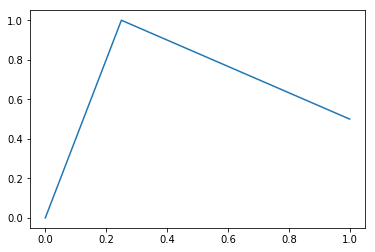

In [7]:
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.show()

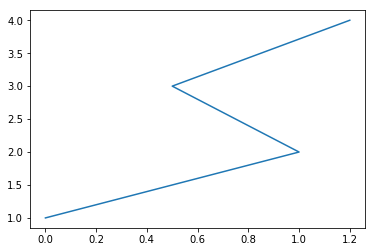

In [33]:
plt.plot([0, 1, 0.5, 1.2], [1, 2, 3, 4])
plt.show()

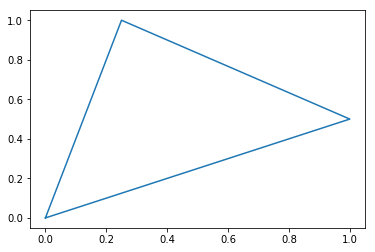

In [36]:
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

**Пример**.  

Построим график функции:  

$y=x^2+2x+6$ для $x\in[-20,20]$ с шагом 0.1

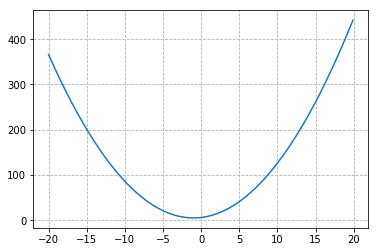

In [34]:
x = np.arange(-20, 20, 0.1)

plt.plot(x, x**2 + 2*x + 6)
plt.grid(ls='--') # сетка для графика
plt.show()

`plt.grid(ls=':' или ls='--')` -- нанести на картинку с графиком сетку (ls - стиль сетки)

* `plt.scatter(x, y, **kwargs)` -- просто рисует точки, не соединяя их линиями

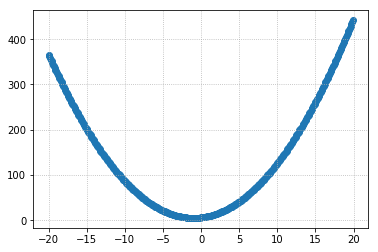

In [35]:
x = np.arange(-20, 20, 0.1)

plt.scatter(x, x**2 + 2*x + 6)
plt.grid(ls=':')
plt.show()

Попробуем поменьше точек:

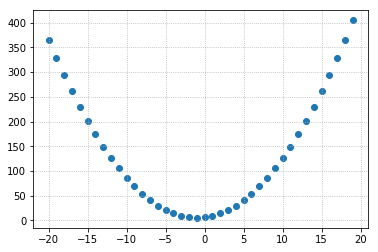

In [37]:
x = np.arange(-20, 20, 1)  # теперь шаг 1, а не 0.1

plt.scatter(x, x**2 + 2*x + 6)
plt.grid(ls=':')
plt.show()

**Вопрос**: Какой ещё функцией numpy удобно задать массив x в данном случае?

Когда точек много, ломаная неотличима от гладкой кривой.

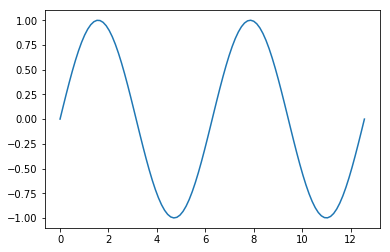

In [8]:
x = np.linspace(0, 4 * np.pi, 100)  # 100 точек

plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

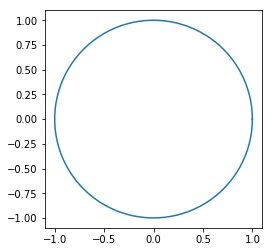

In [9]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.plot(np.cos(t), np.sin(t))
plt.axes().set_aspect(1)
plt.show()

* `plt.axes().set_aspect(1)` -- сделать оси x и y в одинаковой пропорции (тут видно, что получился квадратный рисунок)

То есть чтобы окружности выглядели как окружности, а не как эллипсы, (а квадраты как квадраты, а не как прямоугольники), нужно установить aspect ratio, равный 1.

А вот одна из фигур Лиссажу:  

$x(t) = \sin{2t}$  
$y(t) = \cos{3t}$  
-- её параметрическое задание

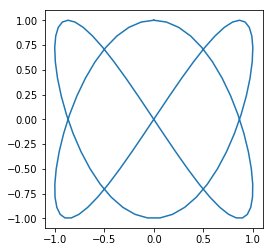

In [10]:
plt.plot(np.sin(2 * t), np.cos(3 * t))  # параметрическое задание
plt.axes().set_aspect(1)
plt.show()

Давайте теперь нарисуем несколько кривых на одном графике - нужно просто написать несколько `plt.plot()` подряд. Каждый из графиков задаётся своей парой массивов координат $x$ и $y$.  
По-умолчанию каждому графику присваиваются цвета из некоторой последовательности цветов; разумеется, их можно изменить.

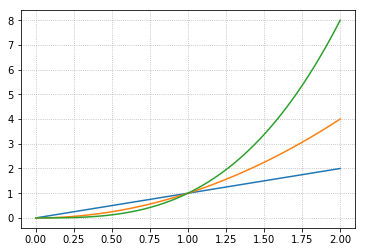

In [11]:
x = np.linspace(0, 2, 100)

plt.plot(x, x)
plt.plot(x, x**2)
plt.plot(x, x**3)

plt.grid(ls=':')
plt.show()

Можно и так (в одном `plt.plot()`):

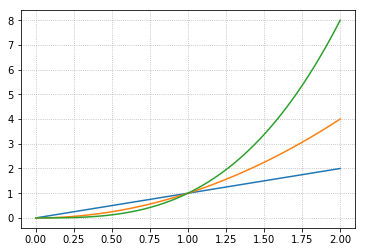

In [12]:
plt.plot(x, x, x, x**2, x, x**3)

plt.grid(ls=':')
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` - красный, `'b'` - синий и т.д.), дальше задаётся тип линии (`'-'` - сплошная, `'--'` - пунктирная, `'-.'` - штрих-пунктирная и т.д.).

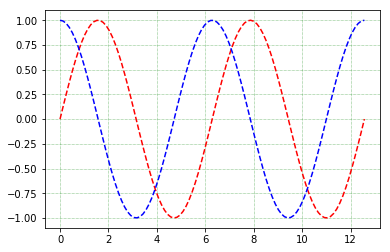

In [13]:
x = np.linspace(0, 4 * np.pi, 100)

# третьим аргументом здесь подаётся стиль линии
plt.plot(x, np.sin(x), 'r--')  
plt.plot(x, np.cos(x), 'b--')

# можно менять цвет и толщину сетки
plt.grid(color='g', linestyle=':', linewidth=0.5)
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями (то есть по сути это будет аналогично функции plt.scater()); аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

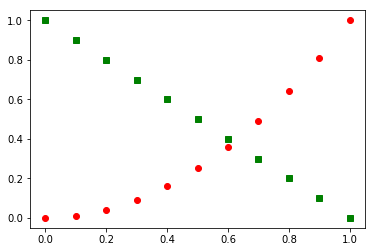

In [54]:
x = np.linspace(0, 1, 11)

plt.plot(x, x ** 2, 'ro')
plt.plot(x, 1 - x, 'gs')

plt.show()

* `plt.figure(figsize=(width, height))` - если написать это перед `plt.plot()`, то изменится размер итоговой картинки с графиком. Пример:

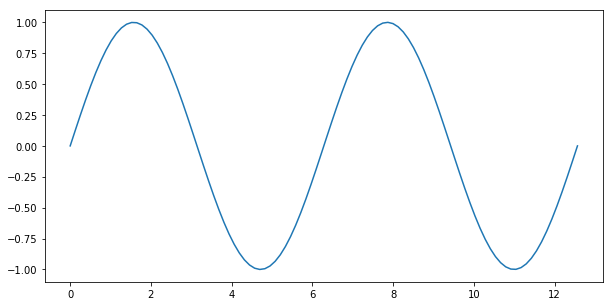

In [14]:
x = np.linspace(0, 4 * np.pi, 100)  # 100 точек

plt.figure(figsize=(10, 5))
plt.plot(x, np.sin(x))
plt.show()

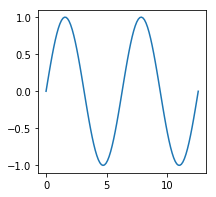

In [15]:
x = np.linspace(0, 4 * np.pi, 100)  # 100 точек

plt.figure(figsize=(3, 3))
plt.plot(x, np.sin(x))
plt.show()

* `plt.plot(x, y, linestyle, label='*текст*')` -- закрепляет за графиком поянение к нему (см. пример ниже)
* `plt.legend()` -- позволяет вывести пояснение к графику (*"легенду"*) (см. пример ниже)

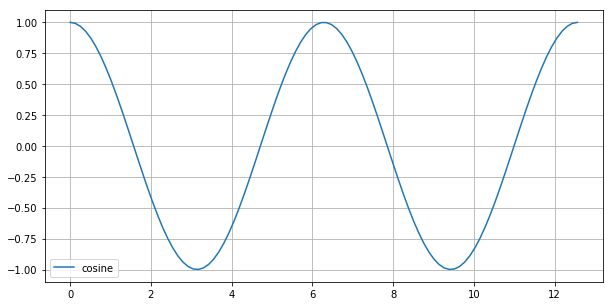

In [16]:
x = np.linspace(0, 4 * np.pi, 100)  # 100 точек

plt.figure(figsize=(10, 5))

plt.plot(x, np.cos(x), label='cosine')

plt.legend()
plt.grid()
plt.show()

Изменим размер шрифта в легенде:

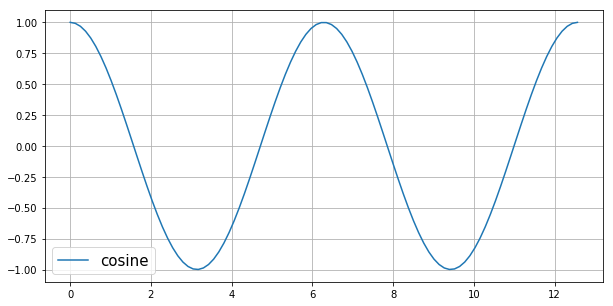

In [17]:
x = np.linspace(0, 4 * np.pi, 100)  # 100 точек

plt.figure(figsize=(10, 5))

plt.plot(x, np.cos(x), label='cosine')

plt.legend(fontsize=15)
plt.grid()
plt.show()

Можно ещё красивее, если использовать Latex:

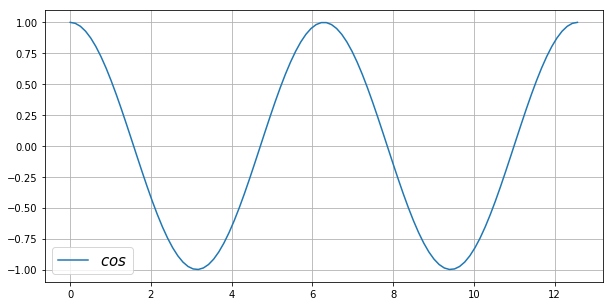

In [18]:
x = np.linspace(0, 4 * np.pi, 100)  # 100 точек

plt.figure(figsize=(10, 5))

plt.plot(x, np.cos(x), label='$cos$')

plt.legend(fontsize=15)
plt.grid()
plt.show()

Таким образом мы уже научились:  
- строить непосредественно сам график по точкам  
- наносить сетку на картинку с графиком
- менять размер картинки с графиком
- изменять и выводить "легенду" (подпись к графику)
- менять цвет графика и стиль линии  
- отрисовывать график, заданный параметрически (см. выше)

Научимся добавлять подпись к осям:

* `plt.xlabel('*текст подписи*', fontsize=*размер шрифта*)` -- подпись к оси X
* `plt.ylabel('*текст подписи*', fontsize=*размер шрифта*)` -- подпись к оси Y

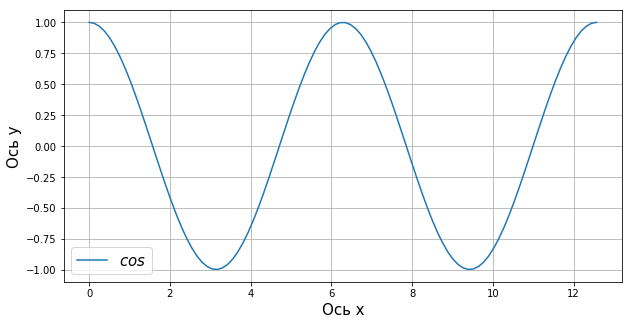

In [19]:
x = np.linspace(0, 4 * np.pi, 100)  # 100 точек

plt.figure(figsize=(10, 5))

plt.plot(x, np.cos(x), label='$cos$')

plt.xlabel('Ось x', fontsize=15)
plt.ylabel('Ось y', fontsize=15)

plt.legend(fontsize=15)
plt.grid()
plt.show()

Чего-то ещё не хватает. Хорошо бы знать, что вообще описывает график. Это можно пояснить в заголовке:

* `plt.title('*текст*', fontsize=*размер шрифта*)` -- задать название у графика

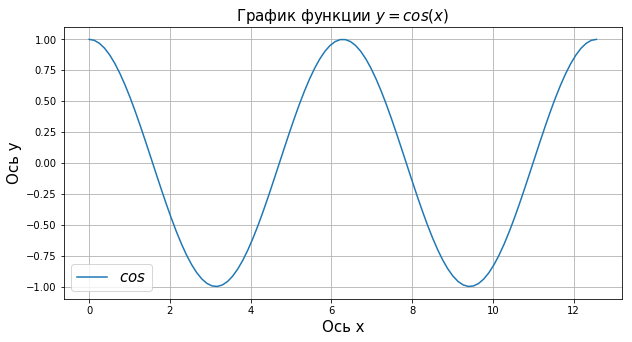

In [20]:
x = np.linspace(0, 4 * np.pi, 100)  # 100 точек

plt.figure(figsize=(10, 5))

plt.title('График функции $y = cos(x)$', fontsize=15)

plt.plot(x, np.cos(x), label='$cos$')

plt.xlabel('Ось x', fontsize=15)
plt.ylabel('Ось y', fontsize=15)

plt.legend(fontsize=15)
plt.grid()
plt.show()

Пример применения всех наших знаний:

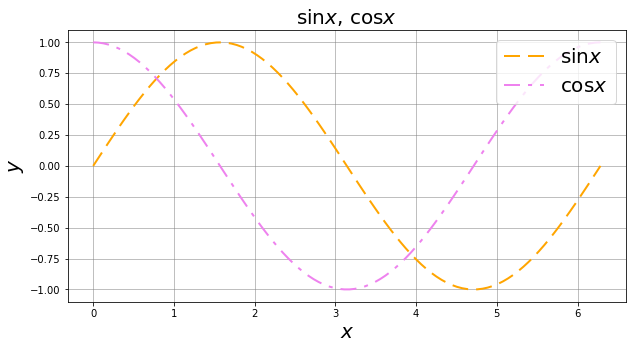

In [21]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 5))

plt.title('$\sin x$, $\cos x$', fontsize=20)

plt.plot(x, np.sin(x), linewidth=2, color="orange", dashes=[8, 4], label='$\sin x$')
plt.plot(x, np.cos(x), linewidth=2, color="violet", dashes=[8, 4, 2, 4], label='$\cos x$')

plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)

plt.legend(fontsize=20, loc=1)
plt.grid(color="grey", linestyle='-', linewidth=0.5)
plt.show()

Можно даже чуть лучше, если добавить ещё пару функций (`plt.xticks()`, `plt.yticks()`), которые подписывают уже сами значения вдоль осей и меняют их шрифт/размер:

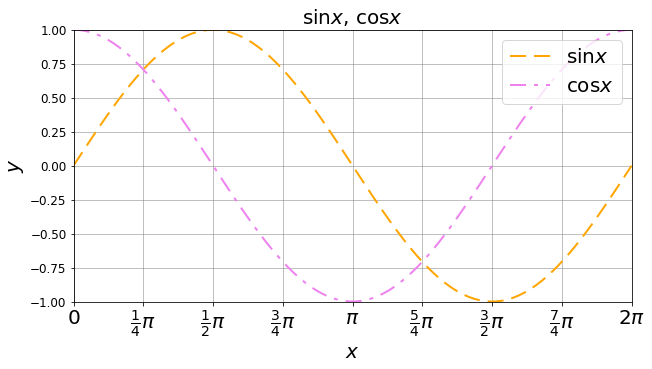

In [22]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 5))

plt.title('$\sin x$, $\cos x$', fontsize=20)

plt.plot(x, np.sin(x), linewidth=2, color="orange", dashes=[8, 4], label='$\sin x$')
plt.plot(x, np.cos(x), linewidth=2, color="violet", dashes=[8, 4, 2, 4], label='$\cos x$')

plt.axis([0, 2 * np.pi, -1, 1])
plt.xticks(np.linspace(0, 2 * np.pi, 9),  # Где сделать отметки
           ('0', r'$\frac{1}{4}\pi$', r'$\frac{1}{2}\pi$',  # Как подписать
            r'$\frac{3}{4}\pi$', r'$\pi$', r'$\frac{5}{4}\pi$',
            r'$\frac{3}{2}\pi$', r'$\frac{7}{4}\pi$', r'$2\pi$'),
           fontsize=20)
plt.yticks(fontsize=12)

plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)

plt.legend(fontsize=20, loc=1)
plt.grid(color="grey", linestyle='-', linewidth=0.5)
plt.show()

**Далее идёт дополнительный материал**

В конце ноутбука, как и всегда, есть список полезных ссылок (рекомендуем ознакомиться, есть ссылки и на другие библиотеки для визуализации, которые способны на большее).  

А сейчас давайте посмотрим, как загружать/сохранять картинки и загружать/сохранять файлы и текстовые данные.

---

Если `linestyle=''`, то точки не соединяются линиями. Сами точки рисуются маркерами разных типов. Тип определяется строкой из одного символа, который чем-то похож на нужный маркер. В добавок к стандартным маркерам, можно определить самодельные.

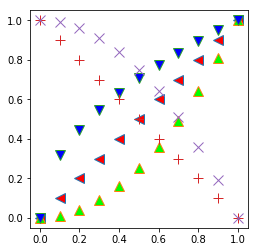

In [23]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x, linestyle='', marker='<', markersize=10, markerfacecolor='#FF0000')
plt.plot(x, x ** 2, linestyle='', marker='^', markersize=10,markerfacecolor='#00FF00')
plt.plot(x, x ** (1/2), linestyle='', marker='v', markersize=10, markerfacecolor='#0000FF')
plt.plot(x, 1 - x, linestyle='', marker='+', markersize=10, markerfacecolor='#0F0F00')
plt.plot(x, 1 - x ** 2, linestyle='', marker='x', markersize=10, markerfacecolor='#0F000F')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.axes().set_aspect(1)
plt.show()

### Логарифмический масштаб

**Вопрос:** когда удобно использовать логарифмический масштаб?

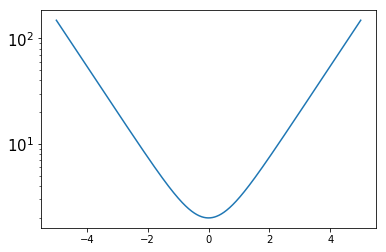

In [24]:
x = np.linspace(-5, 5, 1000)

plt.figure()
plt.plot(x, np.exp(x) + np.exp(-x))
plt.yscale('log')
plt.yticks(fontsize=15)
plt.show()

Можно задать логарифмический масштаб по обоим осям.

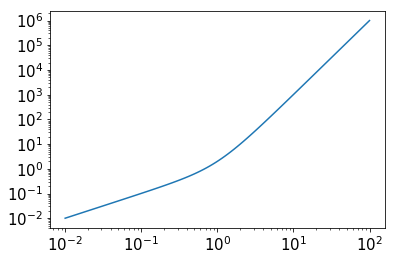

In [25]:
x = np.logspace(-2, 2, 100)

plt.figure()
plt.plot(x, x + x ** 3)
plt.xscale('log'), plt.xticks(fontsize=15)
plt.yscale('log'), plt.yticks(fontsize=15)
plt.show()

### Полярные координаты

Первый массив - $\varphi$, второй - $r$. Вот спираль.

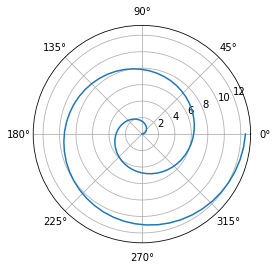

In [37]:
t = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.polar(t, t)
plt.show()

Построим функцию $y = sin(3x) + cos(5x)$ в полярных координатах:

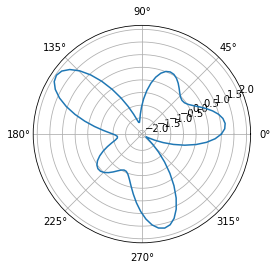

In [38]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.polar(t, np.sin(3 * t) + np.cos(5 * t))
plt.show()

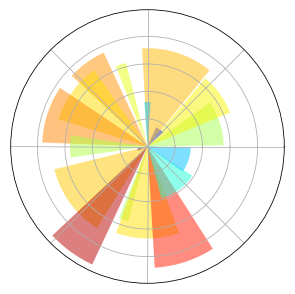

In [39]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

### Экпериментальные данные (отрисовка выборки со статистиками)

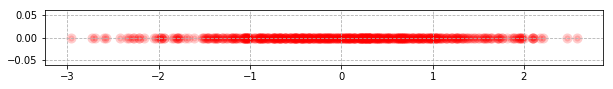

In [40]:
sample = sps.norm.rvs(size=500)

plt.figure(figsize=(10, 1))
plt.grid(ls='--')
plt.scatter(sample, np.zeros(500), alpha=0.2, color = 'r', linewidths=4)  # alpha - прозрачность точки
plt.show()

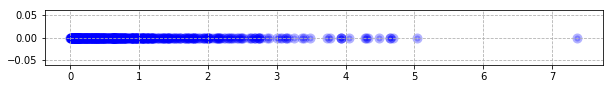

In [41]:
sample = sps.expon.rvs(size=500)

plt.figure(figsize=(10, 1))
plt.grid(ls='--')
plt.scatter(sample, np.zeros(500), alpha=0.3, color='b',linewidths=4)  # alpha - прозрачность точки
plt.show()

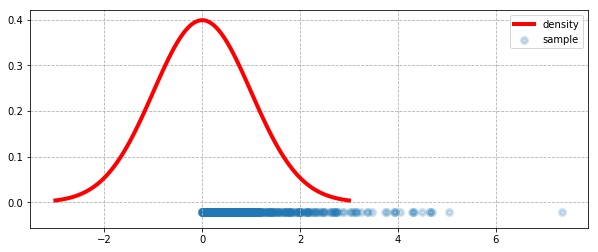

In [42]:
grid = np.linspace(-3, 3, 100)  # задаем сетку для построения графика плотности
plt.figure(figsize=(10, 4))
plt.grid(ls='--')
plt.scatter(sample, np.zeros(500) - 0.02, alpha=0.2, label='sample',linewidths=3)  # label - описание в легенде
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density', linewidth=4)  # color - цвет графика
plt.legend()  # добавляет легенду
plt.show()

Можно добавить график плотности распределения.

Нарисуем гистограмму:

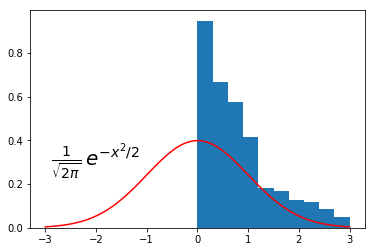

In [43]:
plt.figure()
n, bins, patches = plt.hist(sample, range=(-3, 3), bins=20, normed=True)  # normed - нормированный
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')  # color - цвет графика
plt.text(-2, 0.3, r'$\frac{1}{\sqrt{2\pi}}\,e^{-x^2/2}$',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.show()

Предположим, что выборка приходит постепенно.
Для каждого момента времени посчитаем выборочное среднее и доверительный интервал.
Нанесем их на график.

In [44]:
time = np.arange(1, 201)
means = sample.cumsum() / np.arange(1, 201)

plt.figure(figsize=(15, 8))
plt.scatter(time, sample, alpha=0.2, s=40, label='sample')  # s - размер точек
plt.plot(time, means, color='red', linewidth=2.5, label='sample mean $\overline{X}$')  # linewidth - толщина линии
# заполняет пространство между двумя функциями
plt.fill_between(time, means + 2 / np.sqrt(time), means - 2 / np.sqrt(time), alpha=0.15)
plt.legend()
plt.xlim((1, 200))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
plt.ylim((-3, 3))  # размеры графика по вертикальной оси 
plt.xlabel('Time')  # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Sample by time')  # имя графика
plt.grid()  # добавляем сетку
plt.savefig('example.png')  # сохранение в файл
plt.show()

ValueError: operands could not be broadcast together with shapes (500,) (200,) 

Посмотрим еще на то, как можно закрашивать график в соответствии с какой-то функцией.
Для примера возьмем плотность распределения $\mathscr{N} \left( \begin{pmatrix} 0 \\ 0 \end{pmatrix},  \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix} \right)$.

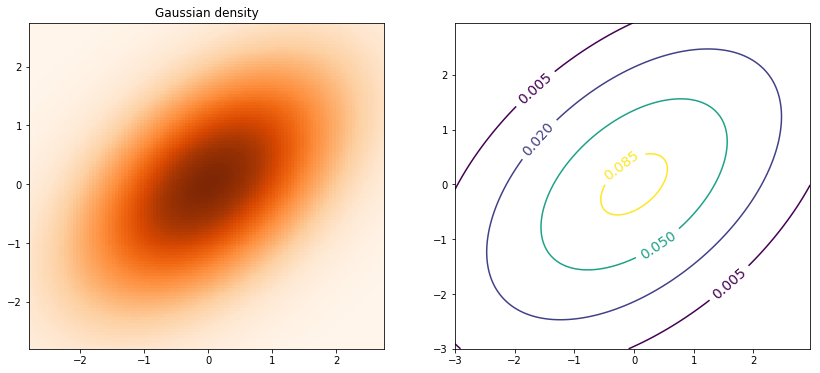

In [23]:
grid = np.mgrid[-3:3:0.05, -3:3:0.05]
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=[0, 0], cov=[[2, 1], [1, 2]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')  # закрасить с интенсивностью density, cmap - цветовая схема
plt.xlim((np.min(grid[0]) + 0.2, np.max(grid[0]) - 0.2))
plt.ylim((np.min(grid[1]) + 0.2, np.max(grid[1]) - 0.2))
plt.title('Gaussian density')

plt.subplot(1, 2, 2)
CS = plt.contour(grid[0], grid[1], density, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
plt.xlim((np.min(grid[0]), np.max(grid[0])))
plt.ylim((np.min(grid[1]), np.max(grid[1])))
    
plt.show()

### Контурные графики

Пусть мы хотим изучить поверхность $z=x* y$. Вот её горизонтали.

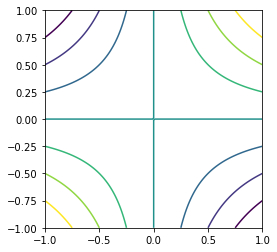

In [88]:
x = np.linspace(-1, 1, 100)
y = x
z = np.outer(x, y)
plt.figure()
plt.contour(x, y, z)
plt.axes().set_aspect(1)
plt.show()

А здесь высота даётся цветом, как на физических географических картах. `colorbar` показывает соответствие цветов и значений $z$.

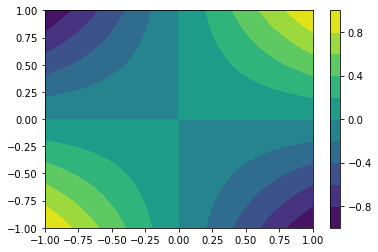

In [89]:
plt.figure()
plt.contourf(x, y, z, np.linspace(-1, 1, 11))

plt.colorbar()

plt.show()

## Images (пиксельные картинки)

Картинка задаётся массивом `z`: `z[i,j]` - это цвет пикселя `i,j`, массив из 3 элементов (`rgb`, числа от 0 до 1).

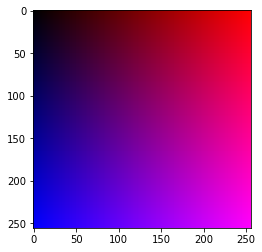

In [90]:
n = 256
u = np.linspace(0, 1, n)
x, y = np.meshgrid(u, u)
z = np.zeros((n, n, 3))
z[:, :, 0] = x
z[:, :, 2] = y

plt.figure()
plt.imshow(z)
plt.show()

## Трёхмерная линия

Задаётся параметрически: $x=x(t)$, $y=y(t)$, $z=z(t)$.

In [29]:
t = np.linspace(0, 4 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t / (4 * np.pi)

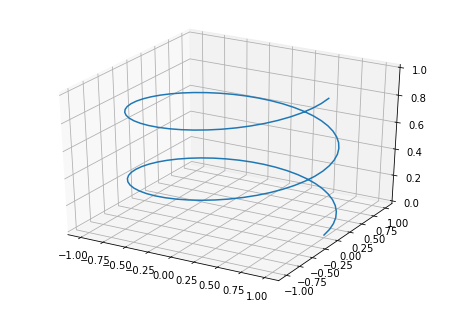

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z)
plt.show()

К сожалению, inline трёхмерную картинку нельзя вертеть мышкой (это можно делать с трёхмерными картинками в отдельных окнах). Но можно задать, с какой стороны мы смотрим.

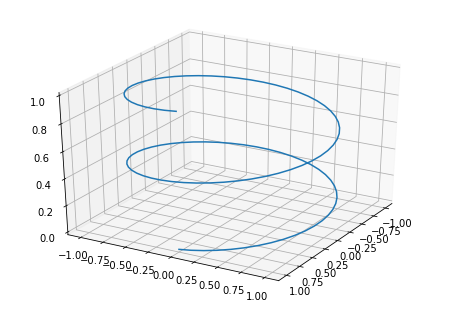

In [31]:
fig = plt.figure()
ax = Axes3D(fig)
ax.elev, ax.azim = 30, 30
ax.plot(x, y, z)
plt.show()

## Поверхности

Все поверхности параметрические: $x=x(u,v)$, $y=y(u,v)$, $z=z(u,v)$. Если мы хотим построить явную поверхность $z=z(x,y)$, то удобно создать массивы $x=u$ и $y=v$ функцией `meshgrid`.

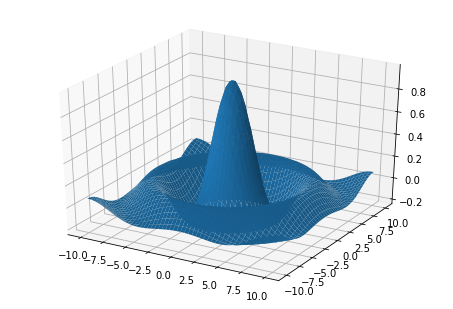

In [33]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1)
plt.show()

Есть много встроенных способов раскраски поверхностей. Так, в методе `gnuplot` цвет зависит от высоты $z$.

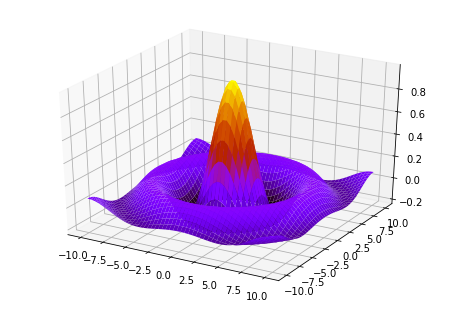

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
plt.show()

Построим **тор (бублик, баранку)**:   
$x = (1 + r \cdot cos(\vartheta\varphi)) \cdot cos(\vartheta\varphi)$  
$y = (1 + r \cdot cos(\vartheta\varphi)) \cdot sin(\vartheta\varphi)$  
$z = r \cdot sin(\vartheta\varphi)$,  
так называемую **параметрическую** поверхность с параметрами-углами $\vartheta$ и $\varphi$.  

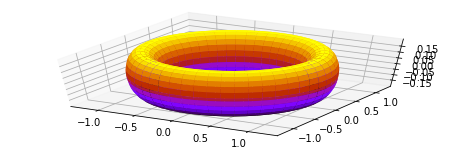

In [103]:
t = np.linspace(0, 2 * np.pi, 50)
th, ph = np.meshgrid(t, t)
r = 0.2
x, y, z = (1 + r * np.cos(ph)) * np.cos(th), (1 + r * np.cos(ph)) * np.sin(th), r * np.sin(ph)
fig = plt.figure()
ax = Axes3D(fig)
ax.elev = 50
ax.set_aspect(0.3)
ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap='gnuplot')
plt.show()

Справка по почти всем функциям отрисовки:
<ul>
    <li>`plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси</li>
    <li>`plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.</li>
    <li>`plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$.</li>
    <li>`plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$.</li>
    <li>`plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`</li>
</ul>

Вспомогательные функции
<ul>
    <li>`plt.figure(figsize=(x, y))` — создать график размера $(x, y)$</li>
    <li>`plt.show()` — показать график.</li>
    <li>`plt.subplot(...)` — добавить подграфик</li>
    <li>`plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси</li>
    <li>`plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси</li>
    <li>`plt.title(name)` — установить имя графика</li>
    <li>`plt.xlabel(name)` — установить название горизонтальной оси</li>
    <li>`plt.ylabel(name)` — установить название вертикальной оси</li>
    <li>`plt.legend(loc=...)` — сделать легенду в позиции loc</li>
    <li>`plt.grid()` — добавить сетку на график</li>
    <li>`plt.savefig(filename)` — сохранить график в файл</li>
</ul>

## Список материалов для самостоятельного изучения

[ещё про matplotlib]  
*Лакончино и со вкусом про matplotlib -- http://www.scipy-lectures.org/intro/matplotlib/index.html*  
*Цветовые гаммы для раскрасок графиков (для аргумента `cmap`) -- https://matplotlib.org/users/colormaps.html*  

[другие библиотеки]  
*Библиотека **seaborn** - надстройка над matplotlib, с ней графики становятся красивее -- http://seaborn.pydata.org/*  
*Библиотека **plotly** для красивых **интерактивных** графиков (можно тыкать мышкой, приближать и отдалять) -- https://plot.ly/feed/#/*  
*Библиотека **dash** - надстройка над plotly, очень крутая штука, можно визуализировать многие вещи, например, информацию на интерактивных картах мира/городов -- https://plot.ly/products/dash/*  
*Ещё **d3.js** одна библиотека для интерактивной визуализации в браузере -- https://d3js.org/*

[крутые статьи]  
*Несколько очень красивых визуализаций -- https://www.analyticsvidhya.com/blog/2018/01/collection-data-visualizations-you-must-see*
*Статья про анализ данных фильмов и их визуализацию -- https://habr.com/post/308162/*  
*11 правил визуализации (статья на Хабре) -- https://habr.com/company/netologyru/blog/341364/*  